Deutsche Josza Algorithm 
it is the generalization of Deutsche problem for an input  the task is to get an output 0 if it is constant and 1 the f is balanced
the condition is when n>=2 the function  are neither constant nor balanced 
in simple this algorithm states any task to constant if its 0 else 1 which is balanced state


In [61]:
import numpy as np
from qiskit import QuantumCircuit ,QuantumRegister
from qiskit.visualization import plot_histogram

In [62]:
def deutsch_josza(n_qubits):
    qc=QuantumCircuit(n_qubits+1)
    if np.random.randint(0,2):
        qc.x(n_qubits)
    if np.random.randint(0,2):
        return qc
    

#choosing half the possible state 
    onstates=np.random.choice(
    range(2**n_qubits), 2**n_qubits // 2,  # number of samples
    replace=False,  # makes sure states are only sampled once
    )
    

def addcontrol_x(qc,bit_string):
    for qubit,bit in enumerate(reversed(bit_string)):
        if bit == "1":
          qc.x(qubit)
    return qc

    for state in onstates:
        qc.barrier()  # Barriers are added to help visualize how the functions are created. They can safely be removed.
        qc = addcontrol_x(qc, f"{state:0b}")
        qc.mcx(list(range(n_qubits)), n_qubits)
        qc = addcontrol_x(qc, f"{state:0b}")

    qc.barrier()

    return qc


In [69]:
display(deutsch_josza(3).draw())

q_0: ─────
          
q_1: ─────
          
q_2: ─────
     ┌───┐
q_3: ┤ X ├
     └───┘

The function is constant.

Deutsch-Jozsa circuit:


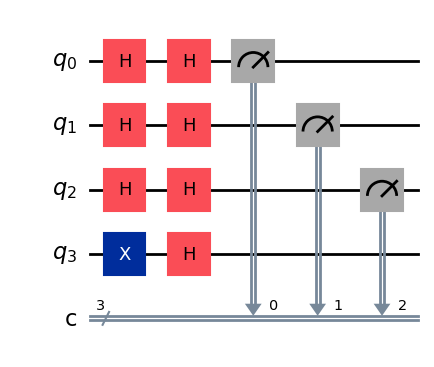


Simulation results:
{'000': 1024}


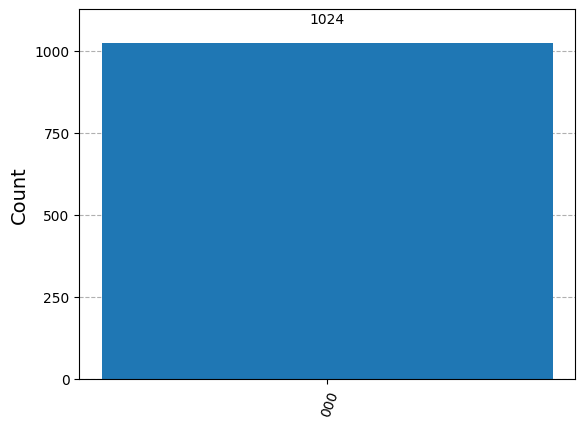

In [64]:
from qiskit import QuantumCircuit,transpile
from qiskit_aer import AerSimulator  # Updated import
from qiskit.visualization import plot_histogram
import random

# Query gate implementation for a given f(x)
def create_query_gate(n_qubits, function):
    """
    Creates the quantum circuit for the query gate U_f.
    
    Args:
    - n_qubits (int): Number of input qubits
    - function (callable): A Boolean function f(x) that returns 0 or 1
    
    Returns:
    - QuantumCircuit: Circuit implementing U_f
    """
    qc = QuantumCircuit(n_qubits + 1)
    
    for x in range(2**n_qubits):
        binary_x = f"{x:0{n_qubits}b}"
        if function(binary_x) == 1:
            # Apply X gate to the auxiliary qubit for f(x)=1
            for i, bit in enumerate(reversed(binary_x)):
                if bit == '0':
                    qc.x(i)
            qc.mcx(list(range(n_qubits)), n_qubits)  # Apply multi-controlled X
            for i, bit in enumerate(reversed(binary_x)):
                if bit == '0':
                    qc.x(i)
    
    return qc

# Deutsch-Jozsa circuit
def deutsch_jozsa_circuit(query_gate, n_qubits):
    """
    Creates the Deutsch-Jozsa circuit.
    
    Args:
    - query_gate (QuantumCircuit): Quantum query gate U_f
    - n_qubits (int): Number of input qubits
    
    Returns:
    - QuantumCircuit: Full Deutsch-Jozsa circuit
    """
    qc = QuantumCircuit(n_qubits + 1, n_qubits)
    
    # Apply H gates to input qubits and initialize |-> on the auxiliary qubit
    qc.h(range(n_qubits))
    qc.x(n_qubits)
    qc.h(n_qubits)
    
    # Add the query gate
    qc.compose(query_gate, inplace=True)
    
    # Apply H gates to input qubits again
    qc.h(range(n_qubits))
    
    # Measure the input qubits
    qc.measure(range(n_qubits), range(n_qubits))
    
    return qc

# Random function generator
def random_function(n_qubits):
    """
    Generates a random constant or balanced function.
    
    Args:
    - n_qubits (int): Number of input qubits
    
    Returns:
    - function: A callable Boolean function f(x)
    - str: "constant" or "balanced"
    """
    is_constant = random.choice([True, False])
    if is_constant:
        value = random.choice([0, 1])
        return lambda x: value, "constant"
    else:
        half_size = 2**(n_qubits - 1)
        balanced_set = set(random.sample(range(2**n_qubits), half_size))
        return lambda x: 1 if int(x, 2) in balanced_set else 0, "balanced"

# Test the Deutsch-Jozsa algorithm
n_qubits = 3
function, func_type = random_function(n_qubits)
query_gate = create_query_gate(n_qubits, function)
dj_circuit = deutsch_jozsa_circuit(query_gate, n_qubits)

print(f"The function is {func_type}.")
print("\nDeutsch-Jozsa circuit:")
display(dj_circuit.draw("mpl"))

# Simulate the circuit using AerSimulator
simulator = AerSimulator()  # Updated to use AerSimulator

results = simulator.run(dj_circuit, shots=1024).result()  # Run directly without execute
counts = results.get_counts()

# Display results
print("\nSimulation results:")
print(counts)
plot_histogram(counts)


In [ ]:
print(dj_circuit)

     ┌───┐┌───┐     ┌───┐          ┌───┐          ┌───┐     ┌───┐┌─┐      
q_0: ┤ H ├┤ X ├──■──┤ X ├───────■──┤ X ├───────■──┤ X ├──■──┤ H ├┤M├──────
     ├───┤├───┤  │  ├───┤┌───┐  │  ├───┤       │  └───┘  │  ├───┤└╥┘┌─┐   
q_1: ┤ H ├┤ X ├──■──┤ X ├┤ X ├──■──┤ X ├───────■─────────■──┤ H ├─╫─┤M├───
     ├───┤├───┤  │  ├───┤├───┤  │  ├───┤┌───┐  │  ┌───┐  │  ├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├┤ X ├──■──┤ X ├┤ X ├──■──┤ X ├┤ X ├──■──┤ X ├──■──┤ H ├─╫──╫─┤M├
     ├───┤├───┤┌─┴─┐└───┘└───┘┌─┴─┐└───┘└───┘┌─┴─┐└───┘┌─┴─┐└───┘ ║  ║ └╥┘
q_3: ┤ X ├┤ H ├┤ X ├──────────┤ X ├──────────┤ X ├─────┤ X ├──────╫──╫──╫─
     └───┘└───┘└───┘          └───┘          └───┘     └───┘      ║  ║  ║ 
c: 3/═════════════════════════════════════════════════════════════╩══╩══╩═
                                                                  0  1  2 
